## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import keras 
import tensorflow
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Neural Networks\gas_turbines.csv")
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

## Data Analysis

In [3]:
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df

AT      AP      AH     TEY
0      6.8594  1007.9  96.799  114.70
1      6.7850  1008.4  97.118  114.72
2      6.8977  1008.8  95.939  114.71
3      7.0569  1009.2  95.249  114.72
4      7.3978  1009.7  95.150  114.72
...       ...     ...     ...     ...
15034  9.0301  1005.6  98.460  111.61
15035  7.8879  1005.9  99.093  111.78
15036  7.2647  1006.3  99.496  110.19
15037  7.0060  1006.8  99.008  110.74
15038  6.9279  1007.2  97.533  111.58

[15039 rows x 4 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [5]:
df.describe()

AT           AP            AH           TEY
count  15039.000000  15039.00000  15039.000000  15039.000000
mean      17.764381   1013.19924     79.124174    134.188464
std        7.574323      6.41076     13.793439     15.829717
min        0.522300    985.85000     30.344000    100.170000
25%       11.408000   1008.90000     69.750000    127.985000
50%       18.186000   1012.80000     82.266000    133.780000
75%       23.862500   1016.90000     90.043500    140.895000
max       34.929000   1034.20000    100.200000    174.610000

In [6]:
df.isna().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [7]:
corr = df.corr()
corr

AT        AP        AH       TEY
AT   1.000000 -0.412953 -0.549432 -0.207495
AP  -0.412953  1.000000  0.042573  0.146939
AH  -0.549432  0.042573  1.000000 -0.110272
TEY -0.207495  0.146939 -0.110272  1.000000

## Data Visualization

<Axes: >

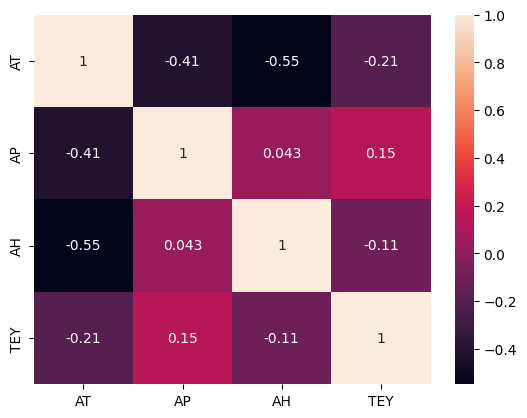

In [8]:
sns.heatmap(corr,annot=True)

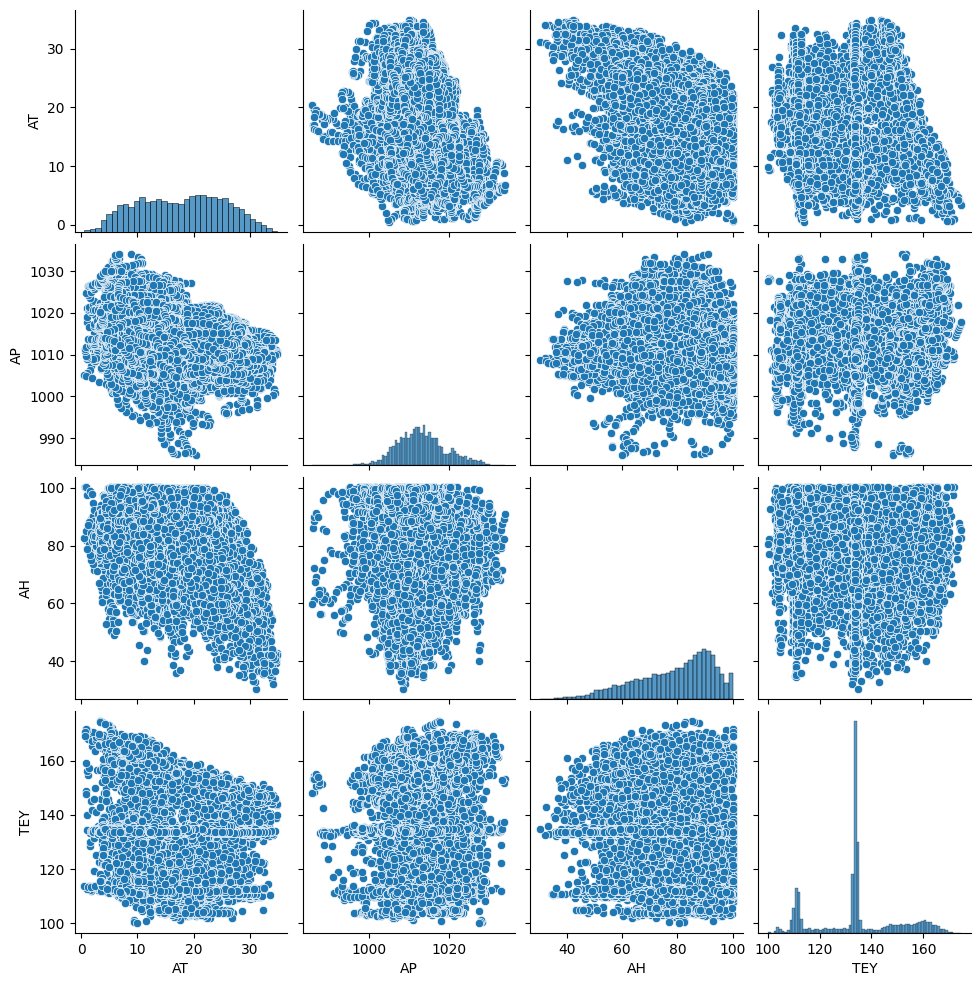

In [9]:
sns.pairplot(df)

## Building the Model

In [10]:
x = df.iloc[:,:-1]
y = df["TEY"]

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=1)

In [12]:
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [14]:
model.fit(xtrain,ytrain, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
61/61 [==============================] - 1s 7ms/step - loss: 3394.2512 - mse: 3394.2512 - mae: 41.3060 - val_loss: 264.4218 - val_mse: 264.4218 - val_mae: 12.5207
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 260.9516 - mse: 260.9516 - mae: 12.1987 - val_loss: 259.0238 - val_mse: 259.0238 - val_mae: 12.1408
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 256.0912 - mse: 256.0912 - mae: 11.9192 - val_loss: 257.6508 - val_mse: 257.6508 - val_mae: 12.0709
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 254.8563 - mse: 254.8563 - mae: 11.8622 - val_loss: 255.3145 - val_mse: 255.3145 - val_mae: 11.8397
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: 253.3108 - mse: 253.3108 - mae: 11.8027 - val_loss: 254.2755 - val_mse: 254.2755 - val_mae: 11.8793
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 251.8450 - mse: 251.8450 - mae: 11.7546 - val_loss: 252.8332

In [15]:
ypred = model.predict(xtest)

47/47 [==============================] - 0s 653us/step


## Model Accuracy

In [16]:
print(r2_score(ytest,ypred))

0.08976719392760624
